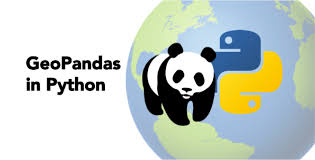



# GeoPandas 0.7.0
### GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

# Description
### The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

# Mapping Tools
### geopandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.

### Loading some example data:

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
from shapely.geometry import Point
%matplotlib inline

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #Creates variable 'world' from dataset within geopandas. On a plot, its a map of the world.

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')) #Creates variable 'cities' from dataset within geopandas. On a plot, its a scatterplot of cities that are capitals on the same scale as teh map of the world.


### Now the GeoDataFrame can be plotted

In [3]:
world.head()
print(world.head())
#Prints the first 5 values of the world dataset

cities.head()
print(cities.head())
#Prints the first 5 values of the cities dataset

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
           name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino  POINT (12.44177 43.93610)
2         Vaduz   POINT (9.51667 47.13372)
3    Luxembourg   POINT (6.13000 49.61166

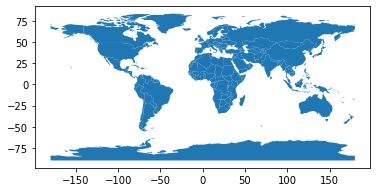

In [4]:
world.plot()
#creates a plot of a map of the world

# Choropleth Maps

### geopandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

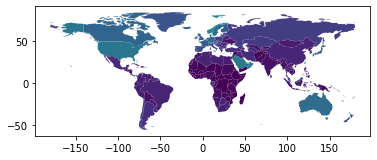

In [5]:
#Plot the Gross Domestic Product (GDP) per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
#renames and redesigns the 'world' plot which shades the country a color based on population estimates. 'world.name!="Antarctica" omits Antarctica from the map.

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
#Creates a variable of 'world' which is a function of global GDP / world population estimates

world.plot(column='gdp_per_cap')
#makes a plot of GDP per Capita

# Creating a legend

### When plotting a map, one can enable a legend using the legend argument:

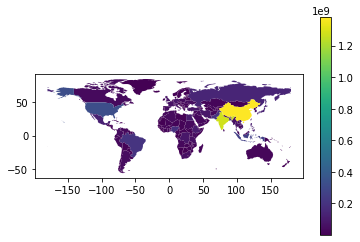

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
#creates a plot with subplots from (1, 1)

world.plot(column='pop_est', ax=ax, legend=True)
#creates legend for the graph based off of population estimates

### We can see that the default appearance of the legend and plot are probably not the desired proportions. We can define the plot (with ax) and the legend axes (with cax) and then pass those into the plot. 

### Using mpl_toolkits to vertically align the plot axes and legend axes:

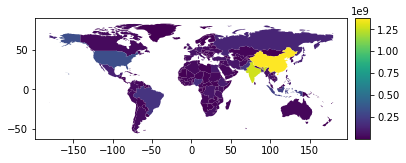

In [7]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)
#fits legend to scale with the rest of the map

cax = divider.append_axes("right", size="5%", pad=0.1)
#sets the appendix of legend 

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)
#Plots 'world; with new legend that is more to scale with the map

### the following shows a plot with the color bar below the map instead of on the side

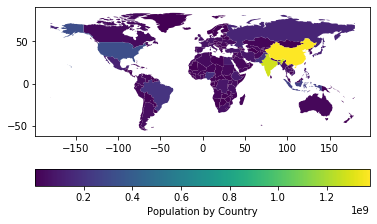

In [8]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
#plots 'world' with new legend now on the x-axis, as noted by the 'horizonatal' orientation

## Choosing colors

### We can also modify the colors presented on the map

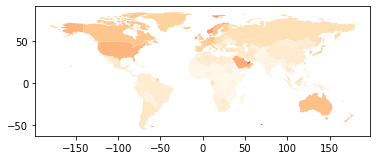

In [9]:
world.plot(column='gdp_per_cap', cmap='OrRd');
#plots 'world' with new color scheme of Orange and Red

### Now we are going to focus on making the colors transparent for when we want to show boundaries. We have two options:

### 1) One option is to do 'world.plot(facecolor="none", edgecolor="black"). This however can cause confusion because "none" and None are different in context of using facecolor and they do opposite things. None does the "default behavior" based on matplotlib. If you use it for facecolor, it actually adds a color.

### 2) For the second option, we can use 'worrld.boundary.plot(). This is more explicit and clear. Less typing and generates the same outcome 


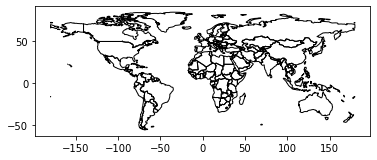

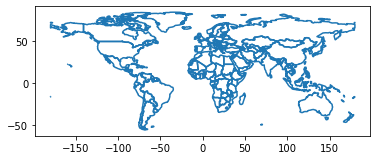

In [10]:
world.plot(facecolor="none", edgecolor="black");
# Makes a transparent plot with distinguishable borders
world.boundary.plot();
# Also makes a transparent map with distinguishable borders but with less typing.

### The way color maps are scaled can be manipulated with the scheme option. Arguments can be passed in classification_kwds dict. 

In [11]:
conda install -c conda-forge mapclassify
#installs mapclassify 

SyntaxError: invalid syntax (<ipython-input-11-5f18886c0c99>, line 1)

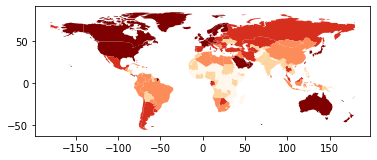

In [12]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');
#creates new 'world' map with an orange/red color scheme highlighting the GDP per capita of each country

## Missing Data

### Sometimes we may want to plot data which contains missing values. In other words some features are not given a known value. Geopandas by default ignores such features. 


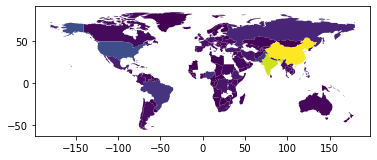

In [13]:
import numpy as np

world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan
#Accesses a group of rows and columns by  a boolean array in 'world'. Shows plot of the world which has missing values of GDP per capita in certain regions.
world.plot(column='pop_est');
#print map of 'world' with missing values of GDP per Capita in certain regions.

### However, passing the missing_kwds argument can specify the style and label of features containing None or NaN

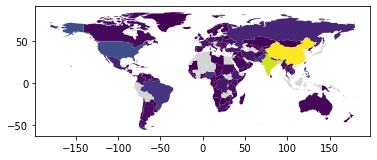

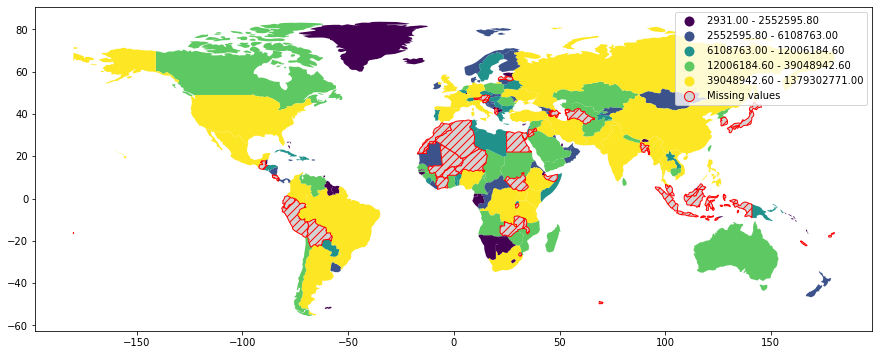

In [14]:
world.plot(column='pop_est', missing_kwds={'color': 'lightgrey'});
#creates new plot for world which can specify the style and label of features containing no value

world.plot(
    column="pop_est",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);
#Prints new 'world' map which included the regions with missing values. How these regions are highlighted can vary.

## Maps with Layers

### Now we want to start working with our 'cities' dataframe and work our way into overlaying the 2 'maps' on top of each other to create a Map with layers. 

### By mapping out the points of major cities, we can see their spread in the plot down below. We can see there are island capitals apparently in the middle of the ocean.

In [ ]:
# Note use of standard `pyplot` line style options
cities.plot(marker='*', color='green', markersize=5);

# Check crs
cities = cities.to_crs(world.crs)

# Now we can overlay over country outlines
# And yes, there are lots of island capitals
# apparently in the middle of the ocean!

### now that we have the cities plotted as points, we can overlay these points with our map of the world

In [ ]:
base = world.plot(color='white', edgecolor='black')
#creates variable 'base' from 'world' which is a transparent map with black borders

cities.plot(ax=base, marker='o', color='red', markersize=5);
#creates a plot for cities which overlays with our plot for 'world'. Can see where the capital cities fall on the map of 'world'
